# Setup

In [1]:
include(joinpath("..","src","setup.jl"))

┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v0.7/AuditoryBistabilityLE/RqG8S.ji for AuditoryBistabilityLE [7e25a372-ade5-11e8-17af-a30e5a9e2c28]
└ @ Base loading.jl:1185


RObject{VecSxp}
$rcalljl_options
$rcalljl_options$height
[1] 360

$rcalljl_options$width
[1] 432




In [3]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 32) < 1 &&
  abs(row[:t_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

params[:t_W_m_σ_t] = 7.0
params[:t_W_m_σ_ϕ] = 7.0
params[:t_W_m_c] = 4.0

settings = TOML.parsefile(joinpath(srcdir,"settings.toml"))
settings["track"]["analyze"]["freq_ridge"] = 2
settings["track"]["analyze"]["scale_ridge"] = 1e-6

1.0e-6

## some examples of the distance function for ridge definition

In [115]:
d = rdist(scale=1e-6,freq=3)
@show exp(-d((1,1),(1,1)))
@show exp(-d((1,1),(1,2)))
@show exp(-d((1,1),(1,3)))
@show exp(-d((1,1),(1,4)))
@show exp(-d((1,1),(1,5)))
@show exp(-d((1,1),(1,6)))
@show exp(-d((1,1),(2,1)))
@show exp(-d((1,1),(2,2)))
@show exp(-d((1,1),(2,3)))

exp(-(d((1, 1), (1, 1)))) = 1.0
exp(-(d((1, 1), (1, 2)))) = 0.8948393168143698
exp(-(d((1, 1), (1, 3)))) = 0.6411803884299546
exp(-(d((1, 1), (1, 4)))) = 0.36787944117144233
exp(-(d((1, 1), (1, 5)))) = 0.1690133154060661
exp(-(d((1, 1), (1, 6)))) = 0.06217652402211632
exp(-(d((1, 1), (2, 1)))) = 0.0
exp(-(d((1, 1), (2, 2)))) = 0.0
exp(-(d((1, 1), (2, 3)))) = 0.0


0.0

# initial simulation run

In [67]:
settings["track"]["analyze"]["max_sources"] = 2
settings["track"]["analyze"]["normalize"] = true
settings["track"]["analyze"]["min_norm"] = 1.0
settings["track"]["analyze"]["source_prior_strength_s"] = 0.2

result = []
for d in [1,3,6,12]
    params[:Δf] = d
    push!(result,bistable_model(15,params,settings,progressbar=false,
                                intermediate_results=true))
end

d = 1


┌ Info: 2.78% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


d = 3
d = 6


┌ Info: 1.39% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


d = 12


In [11]:
using Unitful
using AxisArrays

function pred(x,y)
    pr = deepcopy(result[1].sources.tracks[1].params.source_prior)
    like = zero(pr,prod((size(result[1].cohere,2),size(result[1].cohere,3))))
    AuditoryBistabilityLE.update!(like,vec(x))
    AuditoryBistabilityLE.logpdf(pr + like,vec(y))
end

pred (generic function with 1 method)

In [12]:
function fpred(f1,f2)
    a = AuditoryBistabilityLE.tone(f1,1s)
    b = AuditoryBistabilityLE.tone(f2,1s)
    set = AuditoryBistabilityLE.read_settings(settings)
    l,u = set.rates.freq_limits_Hz.*Hz
    A = cortical(audiospect(a;set.freqs.analyze...);set.scales.analyze...)[:,:,l .. u]
    B = cortical(audiospect(b;set.freqs.analyze...);set.scales.analyze...)[:,:,l .. u]
    pred(abs.(A[1,:,:]),abs.(B[1,:,:]))
end

fpred (generic function with 1 method)

# distances for actual frames

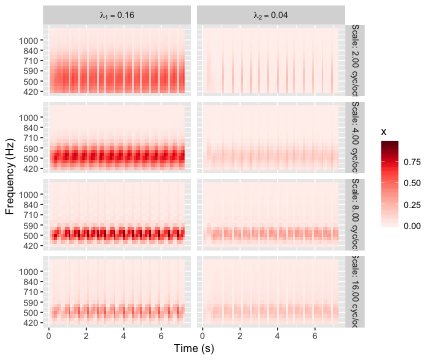

RObject{VecSxp}


In [117]:
rplot(result[1].cohere)

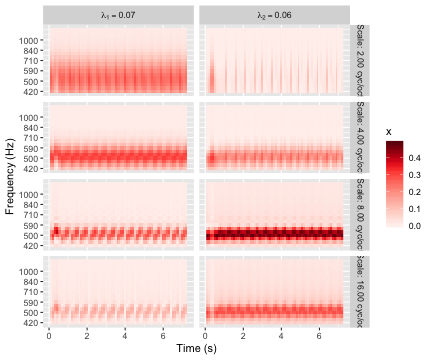

RObject{VecSxp}


In [118]:
rplot(result[1].sources.tracks[1])

In [119]:
sum(result[1].sources.tracks[1].params.source_prior.corr .> 0)

484

In [120]:
sum(result[1].sources.tracks[1].params.source_prior.corr.data .> 0)

280

In [142]:
size(result[1].sources.tracks[1].params.source_prior.corr)

(76, 76)

In [ ]:
ShammaModel.raster_plot(result[1].sources.tracks[1].params.source_prior.corr)

In [194]:
for i in 50:59
    @show pred(result[1].cohere[i,:,:,1],result[1].cohere[i+1,:,:,1])
end

pred((result[1]).cohere[i, :, :, 1], (result[1]).cohere[i + 1, :, :, 1]) = 83.65173339994715
pred((result[1]).cohere[i, :, :, 1], (result[1]).cohere[i + 1, :, :, 1]) = 78.09160920300388
pred((result[1]).cohere[i, :, :, 1], (result[1]).cohere[i + 1, :, :, 1]) = 83.34264043541765
pred((result[1]).cohere[i, :, :, 1], (result[1]).cohere[i + 1, :, :, 1]) = 81.18174909240861
pred((result[1]).cohere[i, :, :, 1], (result[1]).cohere[i + 1, :, :, 1]) = 84.59511148655524
pred((result[1]).cohere[i, :, :, 1], (result[1]).cohere[i + 1, :, :, 1]) = 83.60945538443946
pred((result[1]).cohere[i, :, :, 1], (result[1]).cohere[i + 1, :, :, 1]) = 78.89943866212852
pred((result[1]).cohere[i, :, :, 1], (result[1]).cohere[i + 1, :, :, 1]) = 83.5354154344721
pred((result[1]).cohere[i, :, :, 1], (result[1]).cohere[i + 1, :, :, 1]) = 80.4787362392299
pred((result[1]).cohere[i, :, :, 1], (result[1]).cohere[i + 1, :, :, 1]) = 83.72984392638821


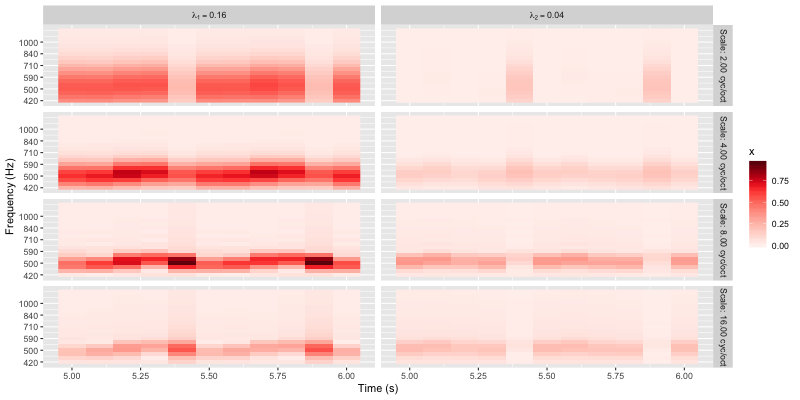

RObject{VecSxp}


In [195]:
rplot(result[1].cohere[50:60,:,:,:])

In [197]:
for i in 50:59
    @show pred(result[2].cohere[i,:,:,1],result[2].cohere[i+1,:,:,1])
end

pred((result[2]).cohere[i, :, :, 1], (result[2]).cohere[i + 1, :, :, 1]) = 80.74650025065293
pred((result[2]).cohere[i, :, :, 1], (result[2]).cohere[i + 1, :, :, 1]) = 69.75922443715817
pred((result[2]).cohere[i, :, :, 1], (result[2]).cohere[i + 1, :, :, 1]) = 80.66150093216746
pred((result[2]).cohere[i, :, :, 1], (result[2]).cohere[i + 1, :, :, 1]) = 68.09215229404232
pred((result[2]).cohere[i, :, :, 1], (result[2]).cohere[i + 1, :, :, 1]) = 86.10418370436453
pred((result[2]).cohere[i, :, :, 1], (result[2]).cohere[i + 1, :, :, 1]) = 79.02848992707806
pred((result[2]).cohere[i, :, :, 1], (result[2]).cohere[i + 1, :, :, 1]) = 68.4274016812482
pred((result[2]).cohere[i, :, :, 1], (result[2]).cohere[i + 1, :, :, 1]) = 81.36316839916739
pred((result[2]).cohere[i, :, :, 1], (result[2]).cohere[i + 1, :, :, 1]) = 69.57155114172801
pred((result[2]).cohere[i, :, :, 1], (result[2]).cohere[i + 1, :, :, 1]) = 86.17350758761145


In [198]:
for i in 50:59
    @show pred(result[3].cohere[i,:,:,1],result[3].cohere[i+1,:,:,1])
end

pred((result[3]).cohere[i, :, :, 1], (result[3]).cohere[i + 1, :, :, 1]) = 78.18856661381955
pred((result[3]).cohere[i, :, :, 1], (result[3]).cohere[i + 1, :, :, 1]) = 77.3057787107225
pred((result[3]).cohere[i, :, :, 1], (result[3]).cohere[i + 1, :, :, 1]) = 82.14351299960853
pred((result[3]).cohere[i, :, :, 1], (result[3]).cohere[i + 1, :, :, 1]) = 80.23515884835027
pred((result[3]).cohere[i, :, :, 1], (result[3]).cohere[i + 1, :, :, 1]) = 82.23905556953979
pred((result[3]).cohere[i, :, :, 1], (result[3]).cohere[i + 1, :, :, 1]) = 77.71903502165469
pred((result[3]).cohere[i, :, :, 1], (result[3]).cohere[i + 1, :, :, 1]) = 76.44013870545344
pred((result[3]).cohere[i, :, :, 1], (result[3]).cohere[i + 1, :, :, 1]) = 79.3369608178073
pred((result[3]).cohere[i, :, :, 1], (result[3]).cohere[i + 1, :, :, 1]) = 72.21609343571723
pred((result[3]).cohere[i, :, :, 1], (result[3]).cohere[i + 1, :, :, 1]) = 83.16448292519087


In [196]:
for i in 50:59
    @show pred(result[4].cohere[i,:,:,1],result[4].cohere[i+1,:,:,1])
end

pred((result[4]).cohere[i, :, :, 1], (result[4]).cohere[i + 1, :, :, 1]) = 77.58257065220582
pred((result[4]).cohere[i, :, :, 1], (result[4]).cohere[i + 1, :, :, 1]) = 75.62675424916137
pred((result[4]).cohere[i, :, :, 1], (result[4]).cohere[i + 1, :, :, 1]) = 79.9737536066424
pred((result[4]).cohere[i, :, :, 1], (result[4]).cohere[i + 1, :, :, 1]) = 76.26383714191377
pred((result[4]).cohere[i, :, :, 1], (result[4]).cohere[i + 1, :, :, 1]) = 72.33060147086057
pred((result[4]).cohere[i, :, :, 1], (result[4]).cohere[i + 1, :, :, 1]) = 76.50578320462249
pred((result[4]).cohere[i, :, :, 1], (result[4]).cohere[i + 1, :, :, 1]) = 74.23711741588869
pred((result[4]).cohere[i, :, :, 1], (result[4]).cohere[i + 1, :, :, 1]) = 74.93617109327019
pred((result[4]).cohere[i, :, :, 1], (result[4]).cohere[i + 1, :, :, 1]) = 77.42848673718902
pred((result[4]).cohere[i, :, :, 1], (result[4]).cohere[i + 1, :, :, 1]) = 74.22244586194195


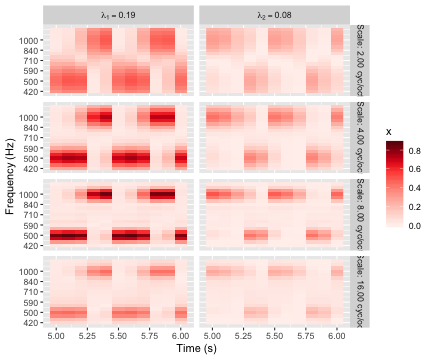

RObject{VecSxp}


In [169]:
rplot(result[4].cohere[50:60,:,:,:])

# Percept testing

In [223]:
settings = TOML.parsefile(joinpath(src,"settings.toml"))
settings["track"]["analyze"]["freq_ridge"] = 3.5
settings["track"]["analyze"]["scale_ridge"] = 1e-8
settings["track"]["analyze"]["source_prior_sds"] = [4.0,16.0,32.0,64.0,128.0]
settings["track"]["analyze"]["time_constants_s"] = [1.0,8.0,16.0]

settings["track"]["analyze"]["max_sources"] = 2
settings["track"]["analyze"]["normalize"] = true
settings["track"]["analyze"]["min_norm"] = 0.2

result = []
for d in [1,3,6,12]
 params[:Δf] = d
  push!(result,bistable_model(15,params,settings,progressbar=false,
                              intermediate_results=true))
end

┌ Warning: Deprecated syntax `implicit assignment to global variable `d``.
│ Use `global d` instead.
└ @ nothing none:0
┌ Warning: Loop variable `d` around In[223]:12 overwrites a variable in an enclosing scope. In the future the variable will be local to the loop instead.
└ @ nothing In[223]:12
┌ Info: 2.78% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44
┌ Info: Sparsity of source-prior (76 × 76) ridge: 448 (8%)
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/priors/ridge_norm.jl:31
┌ Info: Sparsity of source-prior (76 × 76) ridge: 448 (8%)
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/priors/ridge_norm.jl:31
┌ Info: Sparsity of source-prior (76 × 76) ridge: 448 (8%)
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/priors/ridge_norm.jl:31
┌ Info: Spar

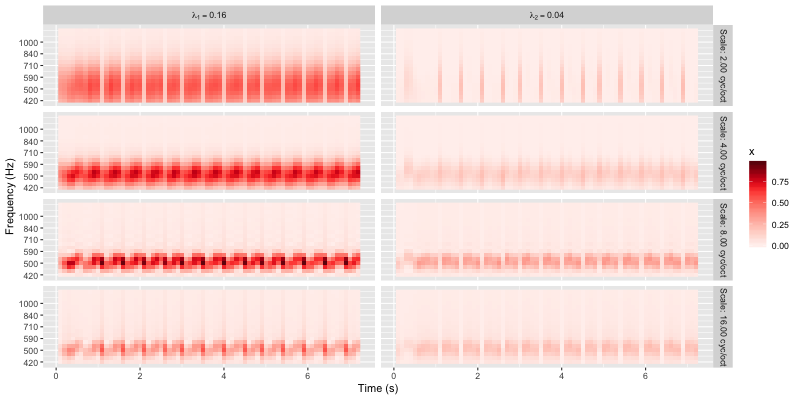

RObject{VecSxp}


In [224]:
rplot(result[1].cohere)

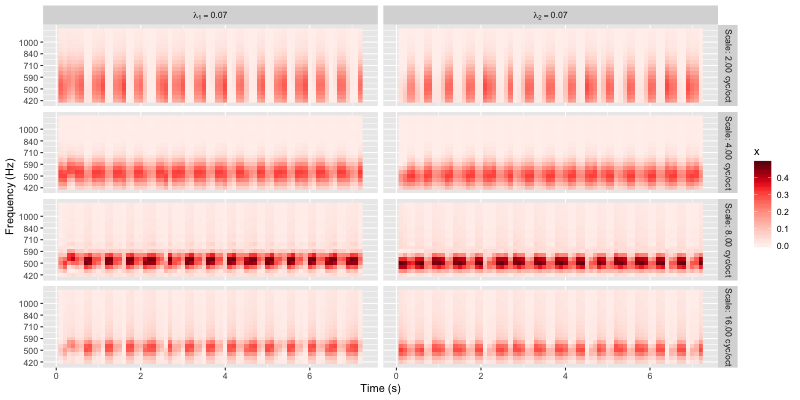

RObject{VecSxp}


In [225]:
rplot(result[1].sources.tracks[1])

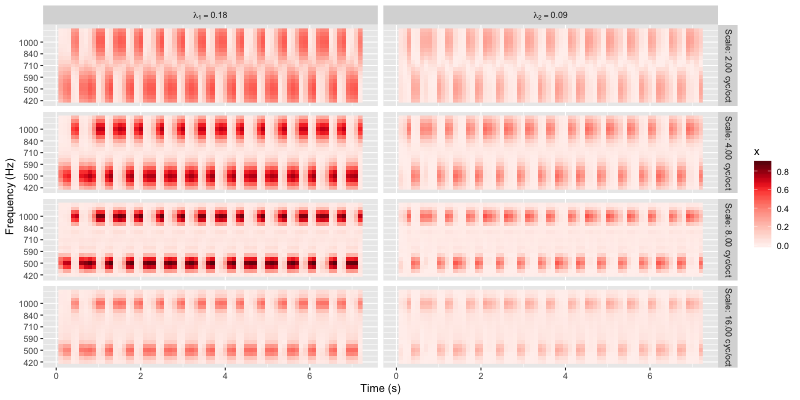

RObject{VecSxp}


In [227]:
rplot(result[4].cohere)

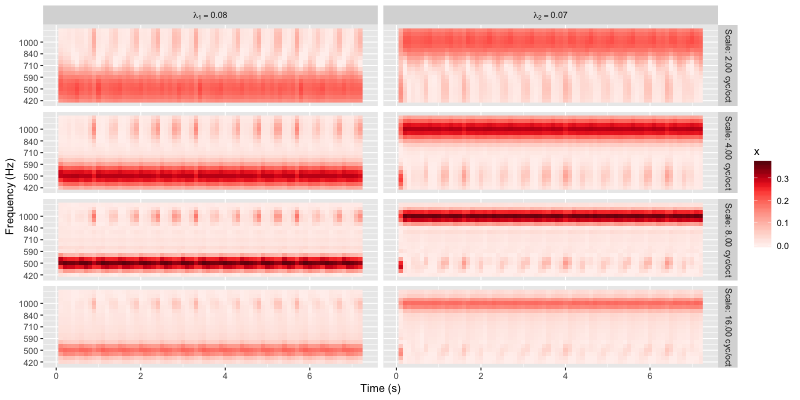

RObject{VecSxp}


In [228]:
rplot(result[4].sources.tracks[1])

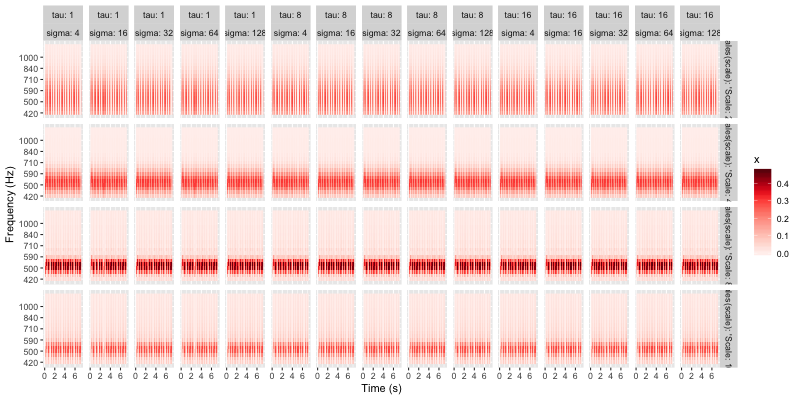

RObject{VecSxp}


In [229]:
rplot(result[1].sources.tracks)

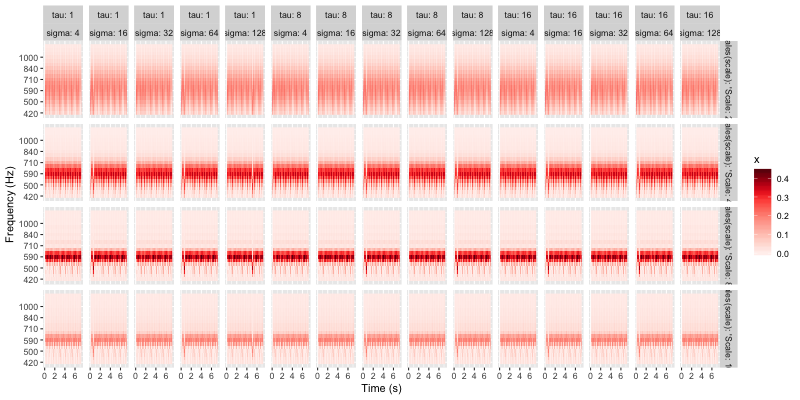

RObject{VecSxp}


In [230]:
rplot(result[2].sources.tracks)

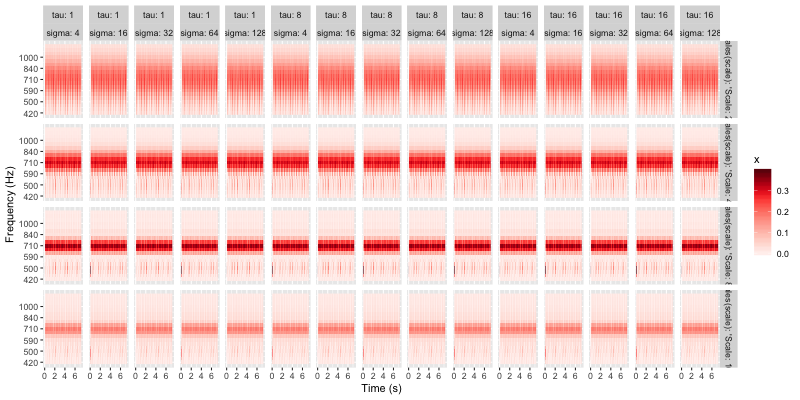

RObject{VecSxp}


In [231]:
rplot(result[3].sources.tracks)

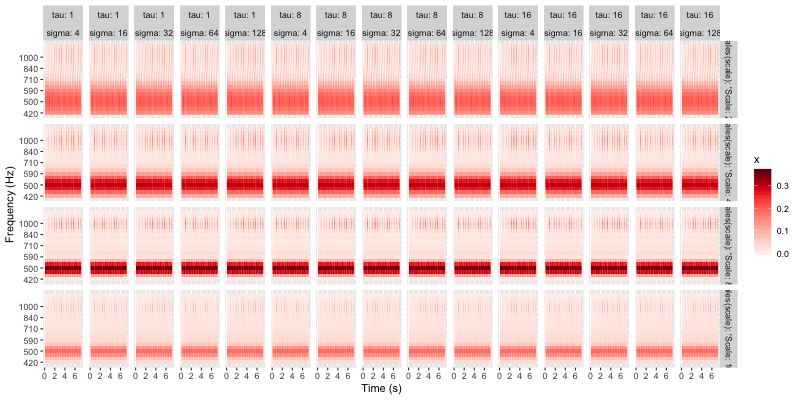

RObject{VecSxp}


In [232]:
rplot(result[4].sources.tracks)

## Discussion

Although the probabilities found by `pred` and `fpred` are consistent with my intuition, the consequences of the prior on this probability do not seem to be matching my intuition. I need to examine the effect of the prior on the measures and see if there is a reasonable aspect of the prior to maniuplate:
one obvious thing might be to alter the extent of the neighborhood in the correlation matrix: however this would invovle more computations.

Principally, by increasing the neibhord, basically all of the percepts are split. (Not that that with a narrower neighbord hood 1st percept fuses)

1. I might explore this by exmaining $\Delta f$ values closer to one another, as it seems like 3st, 6st an 12st are all essentially equivalent to one another still. Perhaps this would work if I just squeeze the delta t's. 

2. Another possibility is that I could examine the effect of the prior on `pred` and `fpred`.


### Distilled Plans

1. make a plot for simulated data, like above, only for different priors


Depending on the outcome of that I might also:

2. explore different $\Delta f$ values
3. consider different neighborhoods for the ridge

# explore prior effect on distances of simplified frames

In [46]:
function pred(sd,N,x,y)
    pr = AuditoryBistabilityLE.ridgenorm(sd,N,(size(x,1),size(x,2)), freq=2, scale=1e-6, threshold=0.05)
    like = zero(pr,size(x,1)*size(x,2))
    AuditoryBistabilityLE.update!(like,vec(x))
    AuditoryBistabilityLE.logpdf(pr + like,vec(y))
end

pred (generic function with 4 methods)

In [47]:
function fpred(sd,N,f1,f2)
    a = AuditoryBistabilityLE.tone(f1,1s)
    b = AuditoryBistabilityLE.tone(f2,1s)
    set = AuditoryBistabilityLE.read_settings(settings)
    l,u = set.rates.freq_limits_Hz.*Hz
    A = cortical(audiospect(a;set.freqs.analyze...);set.scales.analyze...)[:,:,l .. u]
    B = cortical(audiospect(b;set.freqs.analyze...);set.scales.analyze...)[:,:,l .. u]
    pred(sd,N,abs.(A[1,:,:]),abs.(B[1,:,:]))
end

fpred (generic function with 4 methods)

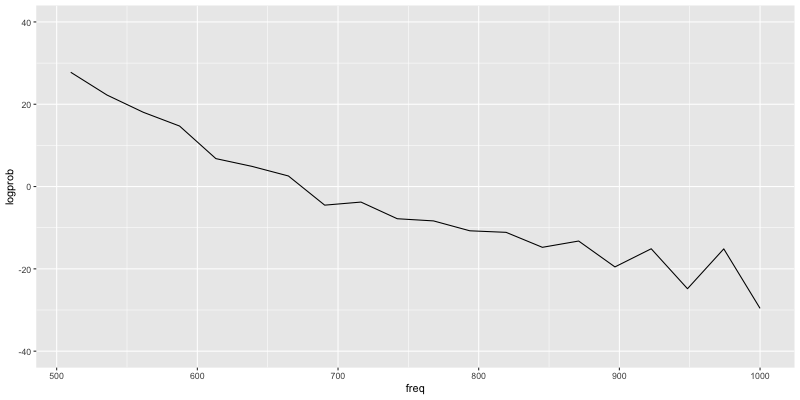

RObject{VecSxp}


In [51]:
fs = range(510,stop=1000,length=20)
vals = map(fs) do f
    fpred(4.0,4,500Hz,f*Hz)
end
R"""qplot(x=$fs,y=$vals,geom='line') + xlab('freq') + ylab('logprob') + ylim(-40,40)"""

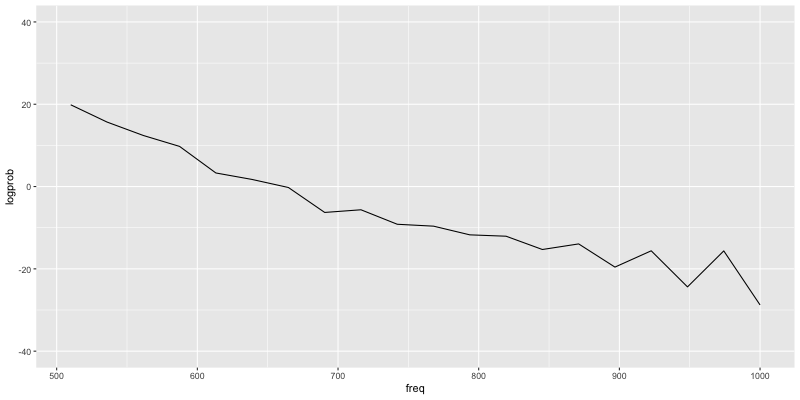

RObject{VecSxp}


In [52]:
fs = range(510,stop=1000,length=20)
vals = map(fs) do f
    fpred(16.0,4,500Hz,f*Hz)
end
R"""qplot(x=$fs,y=$vals,geom='line') + xlab('freq') + ylab('logprob') + ylim(-40,40)"""

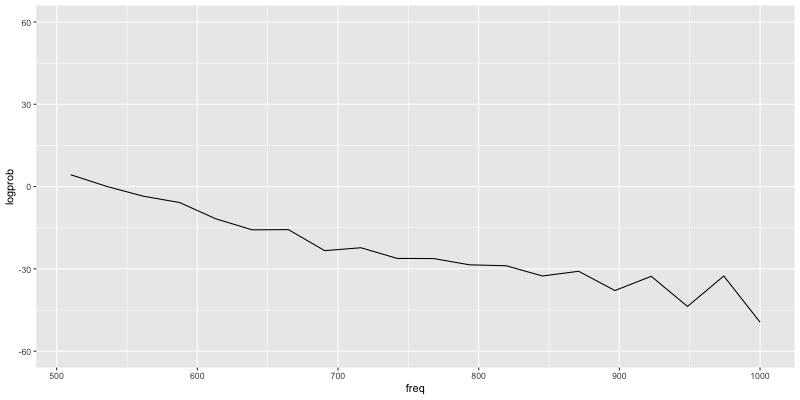

RObject{VecSxp}


In [55]:
fs = range(510,stop=1000,length=20)
vals = map(fs) do f
    fpred(4.0,16,500Hz,f*Hz)
end
R"""qplot(x=$fs,y=$vals,geom='line') + xlab('freq') + ylab('logprob') + ylim(-60,60)"""

# Discussion

The effect seems to fit intuition here. It may just be that the range of priors considered is not large enough. Let's look at some more examples on the real data.

# Effect of prior on tracking

In [33]:
settings = TOML.parsefile(joinpath(srcdir,"settings.toml"))
settings["track"]["analyze"]["freq_ridge"] = 5.0
settings["track"]["analyze"]["scale_ridge"] = 1e-8
settings["track"]["analyze"]["source_prior_sds"] = 10 .^ range(-3,stop=0,length=4)
settings["track"]["analyze"]["source_prior_strength_s"] = 1.0
settings["track"]["analyze"]["time_constants_s"] = range(0.5,stop=32,length=4)

settings["track"]["analyze"]["max_sources"] = 2
settings["track"]["analyze"]["normalize"] = true
settings["track"]["analyze"]["min_norm"] = 0.2

result = []
for d in [1,3,6,12]
    @show d
    params[:Δf] = d
    push!(result,bistable_model(15,params,settings,progressbar=false,
                                intermediate_results=true))
end

d = 1


┌ Info: 2.78% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


d = 3
d = 6


┌ Info: 1.39% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


d = 12


In [23]:
function showtrack(i)
    println(AxisArrays.axes(result[2].sources.tracks)[1][i])
    rplot(result[2].sources.tracks[i])
end

showtrack (generic function with 1 method)

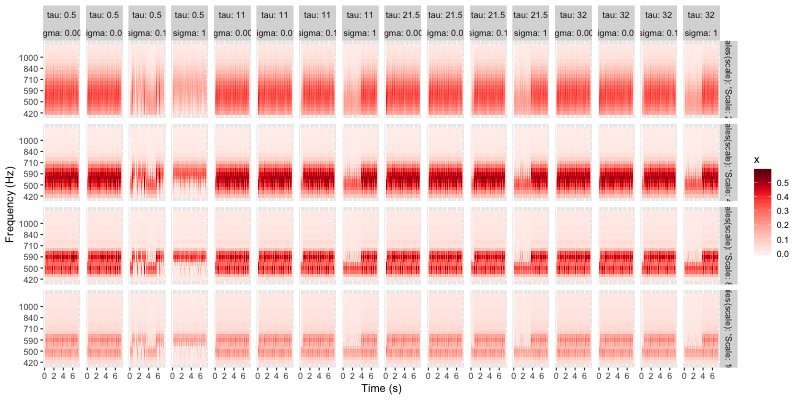

RObject{VecSxp}


In [24]:
rplot(result[2].sources.tracks)

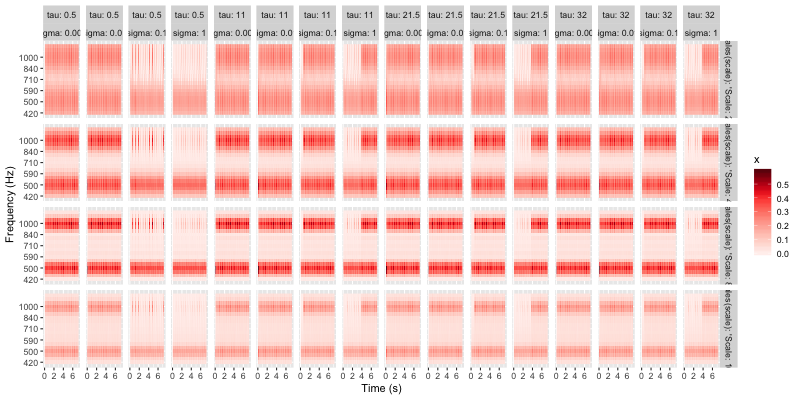

RObject{VecSxp}


In [25]:
rplot(result[4].sources.tracks)

In [41]:
settings["track"]["analyze"]["source_prior_sds"] = 10 .^ range(-1.5,stop=0,length=4)
settings["track"]["analyze"]["source_prior_strength_s"] = 1.0
settings["track"]["analyze"]["time_constants_s"] = range(2,stop=24,length=4)

result = []
for d in [1,3,6,12]
    @show d
    params[:Δf] = d
    push!(result,bistable_model(15,params,settings,progressbar=false,
                                intermediate_results=true))
end

d = 1


┌ Info: 2.78% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


d = 3
d = 6


┌ Info: 1.39% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44


d = 12


In [27]:
function showtrack(i)
    println(AxisArrays.axes(result[2].sources.tracks)[1][i])
    rplot(result[2].sources.tracks[i])
end

showtrack (generic function with 1 method)

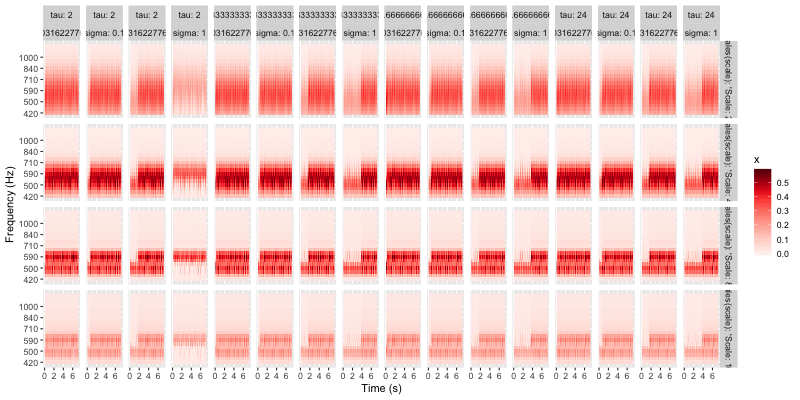

RObject{VecSxp}


In [28]:
rplot(result[2].sources.tracks)

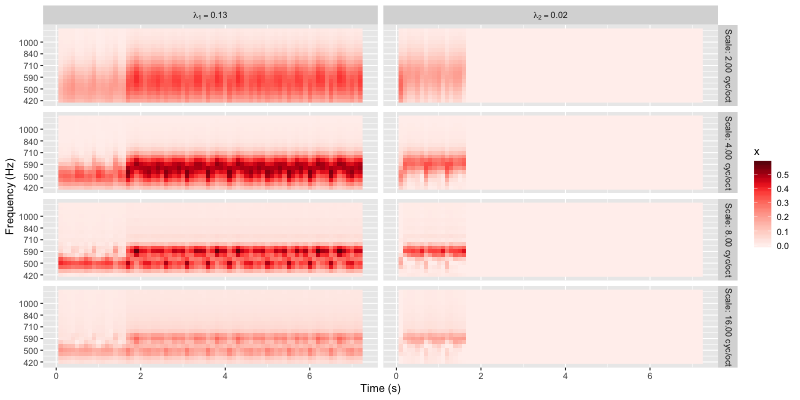

RObject{VecSxp}


In [42]:
rplot(result[2].sources.tracks[3])

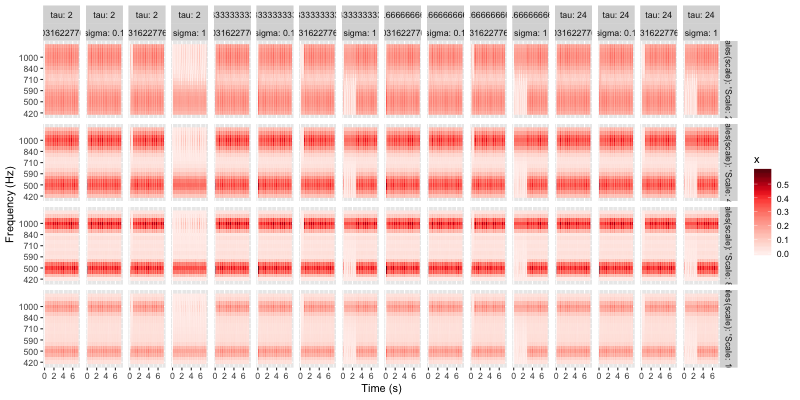

RObject{VecSxp}


In [37]:
rplot(result[4].sources.tracks)

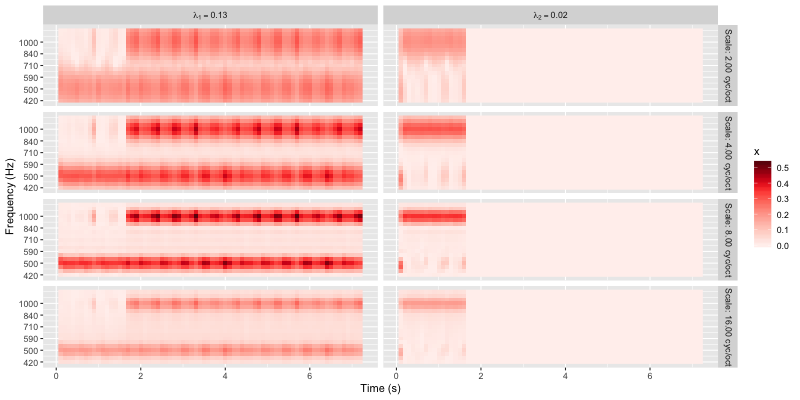

RObject{VecSxp}


In [43]:
rplot(result[4].sources.tracks[3])

# Discussion

How can we understand what's happening here. From what I can see there really is no difference across the stimuli as a function of the prior. That doesn't make any sense to me. I need a plot of the predictions, frame-to-frame, of the fused and the unfused stimuli, across the two most extreme stimuli (3st and 12st).

# plans

First, find the fused and split frames. Then, I need a function to compute the logpdf of each new frame (given the process of inference that would have generated the frames to this point) for a given prior.